In [1]:
import pandas as pd

In [3]:
df_boston = pd.read_csv('BostonHousePrices.csv')
df_boston.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


# 1 Regresión Lineal Múltiple con StatsModels

In [8]:
import statsmodels.api as sm

## 1.1 Definir variables dependientes e independientes

In [9]:
# varaiable dependiente
y = df_boston['Value']

# variables indepentientes
X = df_boston[['Rooms', 'Distance']]

In [11]:
# agregar una constante
X = sm.add_constant(X)
print(X)

#ajustar el modelo
lm = sm.OLS(y, X).fit()

     const  Rooms  Distance
0      1.0  6.575    4.0900
1      1.0  6.421    4.9671
2      1.0  7.185    4.9671
3      1.0  6.998    6.0622
4      1.0  7.147    6.0622
..     ...    ...       ...
501    1.0  6.593    2.4786
502    1.0  6.120    2.2875
503    1.0  6.976    2.1675
504    1.0  6.794    2.3889
505    1.0  6.030    2.5050

[506 rows x 3 columns]


In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 06 May 2023   Prob (F-statistic):           1.84e-75
Time:                        11:46:00   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.2 Ecuación regresión lineal múltiple

In [18]:
# Coef. constante = -34.6361
# Coef. Rooms = 8.8014
# Coef. Distance = 0.4888
# Regresión lineal múltiple: y = a + B1X1 + B2X2 ... +BnXn

y_pred = 8.8014*x['Rooms'] +  0.4888*x['Distance'] - 34.6361
y_pred

0      25.232297
1      24.305608
2      31.029877
3      29.919301
4      31.230709
         ...    
501    24.603070
502    20.346598
503    27.821940
504    26.328306
505    19.660786
Length: 506, dtype: float64

## 1.3 Graficando la regresión

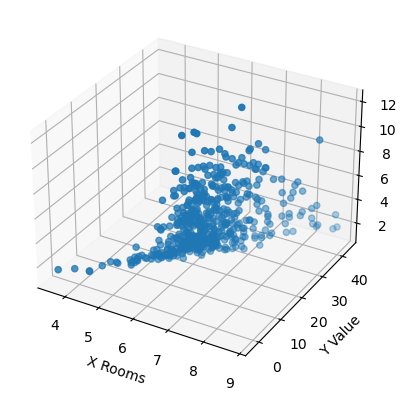

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=x['Rooms'], ys=y_pred, zs=x['Distance'])

ax.set_ylabel('Y Value')
ax.set_xlabel('X Rooms')
ax.set_zlabel('Z Distance')

plt.show()

# 2 Regresión Linear Múltiple con Sklearn

In [32]:
from sklearn import linear_model

In [34]:
# Variable dependiente
y = df_boston['Value']

# Variable independiente
X = df_boston[['Rooms', 'Distance']]

## 1.1 Ajustar el modelo

In [36]:
lm = linear_model.LinearRegression()
lm.fit(X, y)

LinearRegression()

In [39]:
# 5 primero valores de predicción
lm.predict(X)[:5]

array([25.23262311, 24.30597474, 31.03025338, 29.9197274 , 31.23113776])

## 1.2 Tabla de Regresión

In [40]:
# sklearn, a diferencia de statsmodels, no cuenta una tabla de regresión
# en su lugar, se usan métodos individuales para obtener cada dato

# r2 score
lm.score(X, y)

0.4955246476058477

In [41]:
# coeficiente
lm.coef_

array([0.        , 8.80141183, 0.48884854])

In [42]:
lm.intercept_

-34.63605017547333